<a href="https://colab.research.google.com/github/rhelmstedter/salary-comparison/blob/main/salary_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Comparsion for Ventura County School Districts
This notebook contains a salary comparison for 9 school districts in Ventura county.
+ Hueneme Elementary School District (HESD)
+ Ocean View School District (OVSD)
+ Oxnard Union High School District (OUHSD)
+ Oxnard School District (OSD)
+ Pleasant Valley School District (PVSD)
+ Rio School District (RSD)
+ Santa Paula Unified School District (SPUSD)
+ Simi Valley Unified School District (SVUSD)
+ Ventura Unified School District (VUSD)

Every district is up to date as of 08/20/22 with the exception of SPUSD (which agreed to a 9% increase but has not released the new salary scale yet).

Due to the variation in benefits and qualifications for columns across districts, it is difficult to get a straight comparison. It is possible for individual employees to pay more or less than the figures indicated in the table below. E.g., OUHSD employees who choose Kaiser do not have a monthly premium while OVSD employees have the ability to choose a plan that has a $1000 monthly premium. Based on what I could find through conversations with people from other districts and searching through district websites, I have estimated health benefits costs as follows:

| District | Monthly Premium |
|----------|-----------------|
| HESD     | 0               |
| OVSD     | 350             |
| OUHSD    | 180             |
| OSD      | 130             |
| PVSD     | 200             |
| RSD      | 200             |
| SPUSD    | 250             |
| SVUSD    | 250             |
| VUSD     | 0               |
 
Choose a district from the dropdown menu in the next cell. This action will highlight that district on the graphs and compute the differences in salary across a 36 year career. You can also enter a number greater than or equal to zero to calculate the difference a proposed raise would make. E.g., to see how a 12.84% raise would impact career earnings enter the number 12.84 next to `raise_percent` below. 

Bachelor's Degree and 30 Units

This analysis assumes a teacher starts with a Bachelor's degree with 30 units
and remains in VUSD for a 36 year career. The VUSD teacher makes:

🟥 $317,186 less than HESD.
🟥 $108,137 to $259,337 less than OVSD.
🟥 $705,323 to $783,083 less than OUHSD.
🟥 $347,939 to $404,099 less than OSD.
🟥 $188,331 to $274,731 less than PVSD.
🟧 $3,121 less to $83,279 more than RSD.
🟧 $40,939 less to $67,061 more than SPUSD.
🟩 $181,214 to $289,214 more than SVUSD.



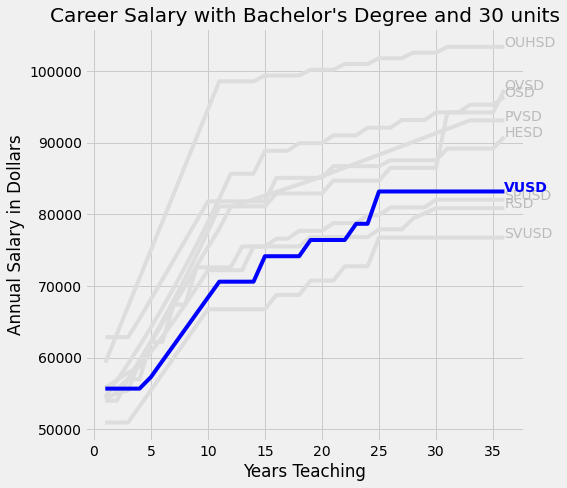


Master's Degree and 60 Units

This analysis assumes a teacher starts with a Master's degree with 60 units
and remains in VUSD for a 36 year career. The VUSD teacher makes:

🟥 $804,562 less than HESD.
🟥 $222,663 to $373,863 less than OVSD.
🟥 $782,995 to $860,755 less than OUHSD.
🟥 $387,711 to $443,871 less than OSD.
🟥 $161,573 to $247,973 less than PVSD.
🟥 $451,558 to $537,958 less than RSD.
🟥 $214,097 to $322,097 less than SPUSD.
🟥 $56,559 to $164,559 less than SVUSD.



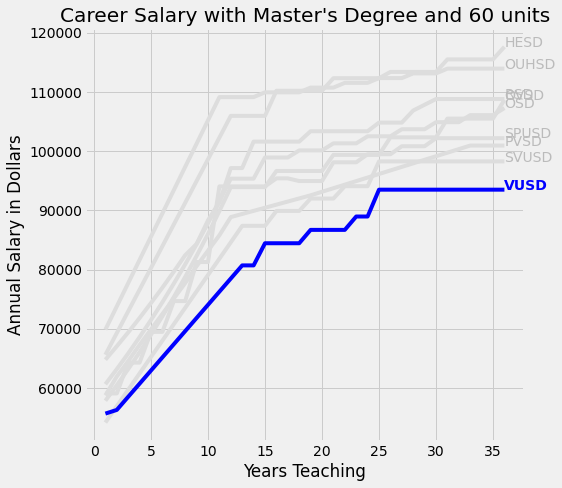


Master's Degree and 75 Units

This analysis assumes a teacher starts with a Master's degree with 75 units
and remains in VUSD for a 36 year career. The VUSD teacher makes:

🟥 $645,127 less than HESD.
🟥 $63,228 to $214,428 less than OVSD.
🟥 $623,560 to $701,320 less than OUHSD.
🟥 $404,585 to $460,745 less than OSD.
🟥 $2,138 to $88,538 less than PVSD.
🟥 $292,123 to $378,523 less than RSD.
🟥 $54,662 to $162,662 less than SPUSD.
🟧 $5,124 less to $102,876 more than SVUSD.



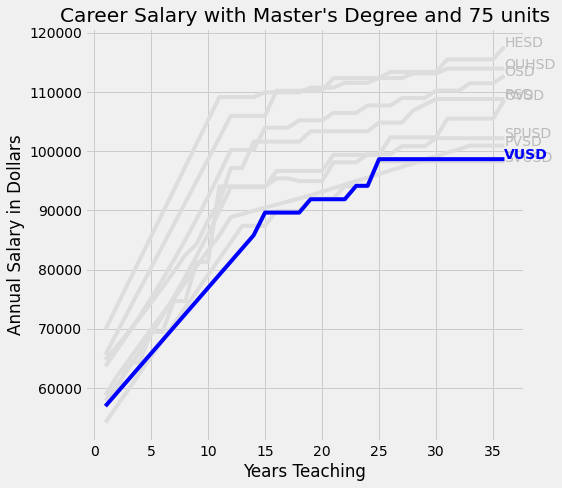

In [1]:
# @title Run Analysis { run: "auto", display-mode: "form" }

import pandas as pd
from matplotlib import pyplot as plt
from typing import List, Dict
from collections import namedtuple

focus = "VUSD"  # @param ["HESD", "OVSD", "OUHSD", "OSD", "PVSD", "RSD", "SPUSD", "SVUSD", "VUSD"]
raise_percent = 0  # @param {type:"number"}
BLUE = "blue"
LIGHTGRAY = "#dddddd"
GRAY = "#bbbbbb"

ventura_df = pd.read_csv(
    "https://raw.githubusercontent.com/rhelmstedter/salary-comparison/main/assets/2022-2023-Ventura.csv",
    index_col="step",
)
rio_df = pd.read_csv(
    "https://raw.githubusercontent.com/rhelmstedter/salary-comparison/main/assets/2022-2023-Rio.csv",
    index_col="step",
)
santa_paula_df = pd.read_csv(
    "https://raw.githubusercontent.com/rhelmstedter/salary-comparison/main/assets/2020-2021-SantaPaula.csv",
    index_col="step",
)
oxnard_union_df = pd.read_csv(
    "https://raw.githubusercontent.com/rhelmstedter/salary-comparison/main/assets/2022-2023-OxnardU.csv",
    index_col="step",
)
hueneme_df = pd.read_csv(
    "https://raw.githubusercontent.com/rhelmstedter/salary-comparison/main/assets/2022-2023-Hueneme.csv",
    index_col="step",
)
ocean_view_df = pd.read_csv(
    "https://raw.githubusercontent.com/rhelmstedter/salary-comparison/main/assets/2022-2023-OceanView.csv",
    index_col="step",
)
oxnard_elem_df = pd.read_csv(
    "https://raw.githubusercontent.com/rhelmstedter/salary-comparison/main/assets/2022-2023-OxnardE.csv",
    index_col="step",
)
pleasant_valley_df = pd.read_csv(
    "https://raw.githubusercontent.com/rhelmstedter/salary-comparison/main/assets/2022-2023-PleasantValley.csv",
    index_col="step",
)
simi_valley_df = pd.read_csv(
    "https://raw.githubusercontent.com/rhelmstedter/salary-comparison/main/assets/2022-2023-SimiValley.csv",
    index_col="step",
)

MONTHLY_PREMIUMS = {
    "HESD": 0,
    "OVSD": 350,
    "OUHSD": 180,
    "OSD": 130,
    "PVSD": 200,
    "RSD": 200,
    "SPUSD": 250,
    "SVUSD": 250,
    "VUSD": 0,
}
DISTRICTS = list(MONTHLY_PREMIUMS.keys())
bachelors_with_30_units: pd.DataFrame = pd.concat(
    [
        hueneme_df["class 3"],
        ocean_view_df["class 3"],
        oxnard_union_df["class 2"],
        oxnard_elem_df["class 3"],
        pleasant_valley_df["class 3"],
        rio_df["class 2"],
        santa_paula_df["class 3"],
        simi_valley_df["class 3"],
        ventura_df["class 2"],
    ],
    axis=1,
    ignore_index=True,
).rename(columns={i: DISTRICTS[i] for i in range(len(DISTRICTS))})
masters_with_60_units: pd.DataFrame = pd.concat(
    [
        hueneme_df["class 5"],
        ocean_view_df["class 5"],
        oxnard_union_df["class 4"],
        oxnard_elem_df["class 5"],
        pleasant_valley_df["class 5"] + 500,
        rio_df["class 5"],
        santa_paula_df["class 5"],
        simi_valley_df["class 6"],
        ventura_df["class 4"],
    ],
    axis=1,
    ignore_index=True,
).rename(columns={i: DISTRICTS[i] for i in range(len(DISTRICTS))})
masters_with_75_units: pd.DataFrame = pd.concat(
    [
        hueneme_df["class 5"],
        ocean_view_df["class 5"],
        oxnard_union_df["class 4"],
        oxnard_elem_df["class 6"],
        pleasant_valley_df["class 5"] + 500,
        rio_df["class 5"],
        santa_paula_df["class 5"],
        simi_valley_df["class 6"],
        ventura_df["class 5"],
    ],
    axis=1,
    ignore_index=True,
).rename(columns={i: DISTRICTS[i] for i in range(len(DISTRICTS))})


def apply_proposed_raise(
    df: pd.DataFrame,
    focus: str,
    raise_percent: float,
) -> pd.DataFrame:
    """Apply a proposed raise to the district in focus.

    :df: The dataframe that contains all the salary data.
    :focus: The district to which the proposed raise will be applied.
    :raise_percent: The proposed raise as a percentage.
    """
    df[focus] = df[focus] * (1 + raise_percent / 100)
    return df


def calc_career_earnings(
    df: pd.DataFrame,
    districts: List[str],
    focus: str,
    raise_percent: float,
) -> Dict[str, int]:
    """Calculates the carreer earnings across each district.

    :df: The DataFrame used to calculate the career earnings
    :districts: the list of districts to include in the calculation.
    :focus: The district to apply the raise to.
    :raise_percent: The proposed raise stored as a float.
    :returns: A dictionary with keys of the district abbreviations and values of the
        carreer earnings.
    """
    df = apply_proposed_raise(df, focus, raise_percent)
    return {district: int(df[district].sum()) for district in districts}


def calc_career_diffs(
    career_earnings: Dict[str, int],
    monthly_premiums: Dict[str, int],
    districts: List[str],
    focus: str,
    degree: str,
    units: int,
) -> None:
    """Calculates and displays the differnces in earnings across a 36 year teaching career.

    :career_earnings: A dictionary with keys containing the district abbreviations and
        values of the career earnings for each district.
    :districts: The list of districts to include in calculating the differences in earnings.
    :focus: The district of focus. All other earnings are subtracted from this district.
    :degree: The degree held by the teacher, either Bachelor's or Master's.
    :units: The number of units obtained by the teacher.

    :returns: None
    """
    career_premiums = {
        district: (monthly * 12 * 36) for district, monthly in monthly_premiums.items()
    }
    career_earnings_deltas = [
        career_earnings[focus] - career_earnings[district] for district in districts
    ]
    career_earnings_deltas_insurance = [
        (career_earnings[focus] - career_premiums[focus])
        - (career_earnings[district] - career_premiums[district])
        for district in districts
    ]
    print(
        f"This analysis assumes a teacher starts with a {degree} degree with {units} units\n"
        f"and remains in {focus} for a 36 year career. The {focus} teacher makes:\n"
    )
    for district, delta, insurance_delta in zip(
        districts, career_earnings_deltas, career_earnings_deltas_insurance
    ):
        if district == focus:
            continue
        if insurance_delta < 0 and delta < 0:
            if insurance_delta == delta:
                print(f"🟥 ${abs(delta):,.0f} less than {district}.")
            else:
                print(
                    f"🟥 ${abs(insurance_delta):,.0f} to ${abs(delta):,.0f} less than {district}."
                )
        elif insurance_delta >= 0 and delta <= 0:
            print(
                f"🟧 ${abs(delta):,.0f} less to ${abs(insurance_delta):,.0f} more than {district}."
            )
        elif insurance_delta >= 0 and delta >= 0:
            if insurance_delta == delta:
                print(f"🟩 ${abs(delta):,.0f} more than {district}.")
            else:
                print(
                    f"🟩 ${abs(delta):,.0f} to ${abs(insurance_delta):,.0f} more than {district}."
                )
    print()


def plot_salaries(
    df: pd.DataFrame,
    districts: List[str],
    focus: str,
    degree: str,
    units: int,
) -> None:
    """Creates and displays the plot for the salary visualization.

    :df: DataFrame that contains the salary for each district based on the parameters given.
    :districts: The list of districts to include in the plot.
    :focus: The district to highlight in blue on the chart.
    :degree: The degree held by the teacher, either Bachelor's or Master's.
    :units: The number of units obtained by the teacher.

    :returns: None
    """

    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(8, 7))
    for district in districts:
        if district == focus:
            line_color = BLUE
            text_color = BLUE
            fontweight = "bold"
        else:
            line_color = LIGHTGRAY
            text_color = GRAY
            fontweight = "light"
        plt.text(
            max(df.index),
            df.loc[36, district],
            s=district,
            color=text_color,
            fontweight=fontweight,
        )
        plt.plot(df.index, df[district], color=line_color)
    plt.title(f"Career Salary with {degree} Degree and {units} units")
    plt.xlabel("Years Teaching")
    plt.ylabel("Annual Salary in Dollars")
    plt.tight_layout()
    plt.show()


SalaryParameters = namedtuple("SalaryParameters", ["degree", "dataframe", "units"])
parameter_sets = (
    SalaryParameters("Bachelor's", bachelors_with_30_units, 30),
    SalaryParameters("Master's", masters_with_60_units, 60),
    SalaryParameters("Master's", masters_with_75_units, 75),
)
for parameter_set in parameter_sets:
    print(f"{parameter_set.degree} Degree and {parameter_set.units} Units\n")
    career_earnings_bachelors = calc_career_earnings(
        df=parameter_set.dataframe,
        districts=DISTRICTS,
        focus=focus,
        raise_percent=raise_percent,
    )
    calc_career_diffs(
        career_earnings_bachelors,
        monthly_premiums=MONTHLY_PREMIUMS,
        districts=DISTRICTS,
        focus=focus,
        degree=parameter_set.degree,
        units=parameter_set.units,
    )
    plot_salaries(
        parameter_set.dataframe,
        districts=DISTRICTS,
        focus=focus,
        degree=parameter_set.degree,
        units=parameter_set.units,
    )
    print()

## Notes
The analysis above is the result of converting salary schedules from pdfs to csv files (some of which I have had to type out by hand). While I have tried to be as accurate as possible in my analysis, it is possible that I made a mistake when transcribing salaries, or in the calculations included in the code. If anyone notices a mistake please let me know at rhelmstedter@gmail.com. I will do my best to correct it as soon a possible. All of the salary schedules are publically available in PDF form from the respective district webites. They can also be found in PDF and CSV on the [github repo](https://github.com/rhelmstedter/salary-comparison) I have put togther.